Resources used: https://mne.tools/mne-bids/stable/auto_examples/read_bids_datasets.html#sphx-glr-auto-examples-read-bids-datasets-py <br> and https://mne.tools/stable/auto_tutorials/intro/10_overview.html

In [1]:
import os
import os.path as op

import openneuro
from mne.datasets import sample

from mne_bids import (
    BIDSPath,
    find_matching_paths,
    get_entity_vals,
    make_report,
    print_dir_tree,
    read_raw_bids,
)

Dataset: https://openneuro.org/datasets/ds004504/versions/1.0.8

In [2]:
dataset = "ds004504"
subject = "001"

# Download one subject's data from each dataset
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)

openneuro.download(dataset=dataset, target_dir=bids_root, include=[f"sub-{subject}"])


👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 8 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


In [3]:
print_dir_tree(bids_root, max_depth=3)

|ds004504\
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-001\
|------ eeg\
|--------- sub-001_task-eyesclosed_channels.tsv
|--------- sub-001_task-eyesclosed_eeg.json
|--------- sub-001_task-eyesclosed_eeg.set


Make a report about dataset at bids_root

In [4]:
print(make_report(bids_root))

Summarizing participants.tsv D:\mne_data\ds004504\participants.tsv...
The participant template found: sex were all unknown;
handedness were all unknown;
ages all unknown
 The A dataset of EEG recordings from: Alzheimer's disease, Frontotemporal
dementia and Healthy subjects dataset was created by Andreas Miltiadous,
Katerina D. Tzimourta, Theodora Afrantou, Panagiotis Ioannidis, Nikolaos
Grigoriadis, Dimitrios G. Tsalikakis, Pantelis Angelidis, Markos G. Tsipouras,
Evripidis Glavas, Nikolaos Giannakeas, and Alexandros T. Tzallas and conforms to
BIDS version v1.2.1. This report was generated with MNE-BIDS
(https://doi.org/10.21105/joss.01896). The dataset consists of 1 participants
(sex were all unknown; handedness were all unknown; ages all unknown) .


C:\Users\wkle2\AppData\Local\Temp\ipykernel_11804\3390368180.py:1: RuntimeWarning: No *scans.tsv files found. Currently, we do not generate a report without the scans.tsv files.
  print(make_report(bids_root))


In [5]:
sessions = get_entity_vals(bids_root, "session", ignore_sessions="None")
datatype = "eeg"
extensions = [".set", ".tsv", ".json",]
bids_paths = find_matching_paths(
    bids_root, datatypes=datatype, sessions=sessions, extensions=extensions
)
print(bids_paths)

[BIDSPath(
root: D:/mne_data/ds004504
datatype: eeg
basename: sub-001_task-eyesclosed_channels.tsv), BIDSPath(
root: D:/mne_data/ds004504
datatype: eeg
basename: sub-001_task-eyesclosed_eeg.json), BIDSPath(
root: D:/mne_data/ds004504
datatype: eeg
basename: sub-001_task-eyesclosed_eeg.set)]


Output data as a string

In [6]:
task = "eyesclosed"
suffix = "eeg" # Identical to datatype for raw MEG and EEG

# session = "None"
bids_path = BIDSPath(root=bids_root, datatype=datatype)
bids_path = bids_path.update(subject=subject, task=task, suffix=suffix)
print(bids_path) # Pass extensions to BIDSPath via extension='.extension' if needed

D:/mne_data/ds004504/sub-001/eeg/sub-001_task-eyesclosed_eeg.set


In [7]:
raw = read_raw_bids(bids_path=bids_path, verbose=False)

C:\Users\wkle2\AppData\Local\Temp\ipykernel_11804\3433710750.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\wkle2\AppData\Local\Temp\ipykernel_11804\3433710750.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "D:\mne_data\ds004504\sub-001\**\eeg\sub-001*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\wkle2\AppData\Local\Temp\ipykernel_11804\3433710750.py:1: RuntimeWarning: Unable to map the following column(s) to to MNE:
Gender: F
Age: 57
Group: A
MMSE: 16
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read subject metadata

In [8]:
print(raw.info["subject_info"])

<subject_info | his_id: sub-001>


Read powerline info

In [9]:
print(raw.info["line_freq"])

50.0


Read sampling frequency

In [10]:
print(raw.info["sfreq"])

500.0


Plot raw data

In [11]:
print(raw), print(raw.info)

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 line_freq: 50.0
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: sub-001>
>


(None, None)

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


C:\Users\wkle2\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


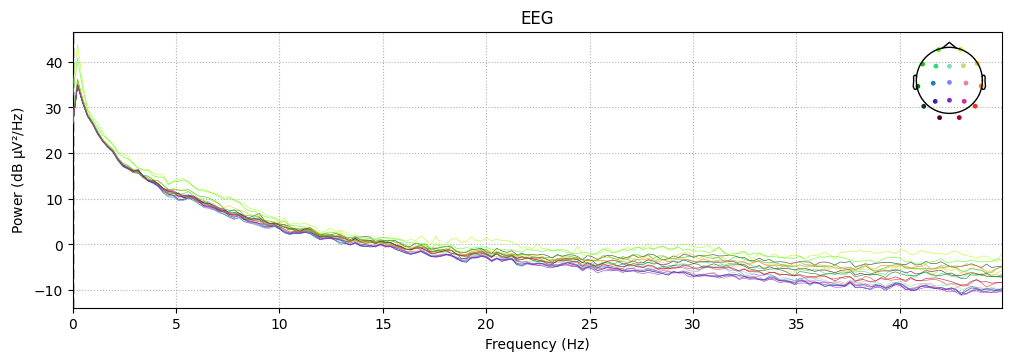

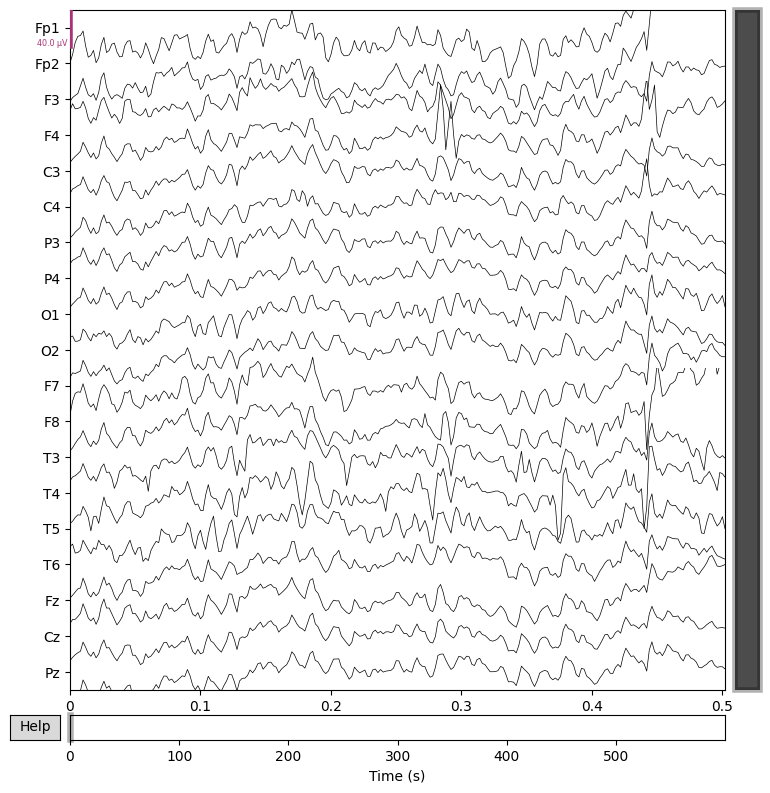

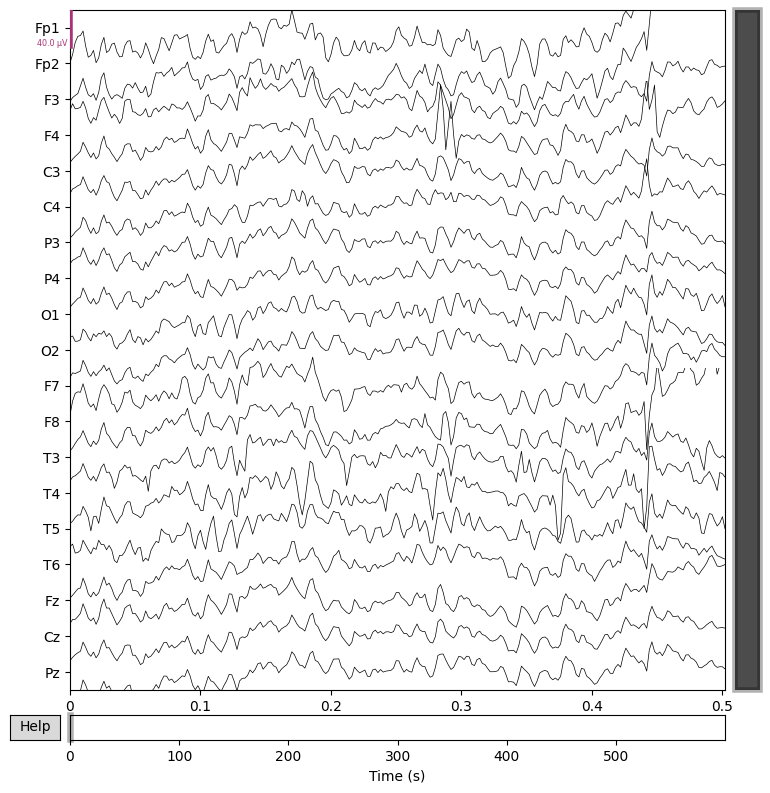

In [12]:
# Display raw data in usable charts
raw.compute_psd(fmax=45).plot(picks="data", exclude="bads", amplitude=False)
raw.plot(duration=0.5, n_channels=20)

## Independent component analysis (ICA) of raw data

In [13]:
import mne

Fitting ICA to data using 19 channels (please be patient, this may take a while)


C:\Users\wkle2\AppData\Local\Temp\ipykernel_11804\1183840534.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 19 components
Fitting ICA took 8.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated


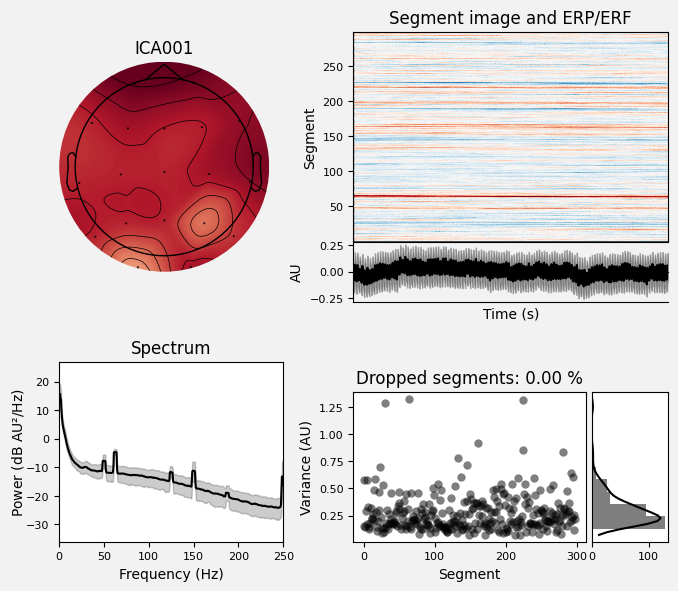

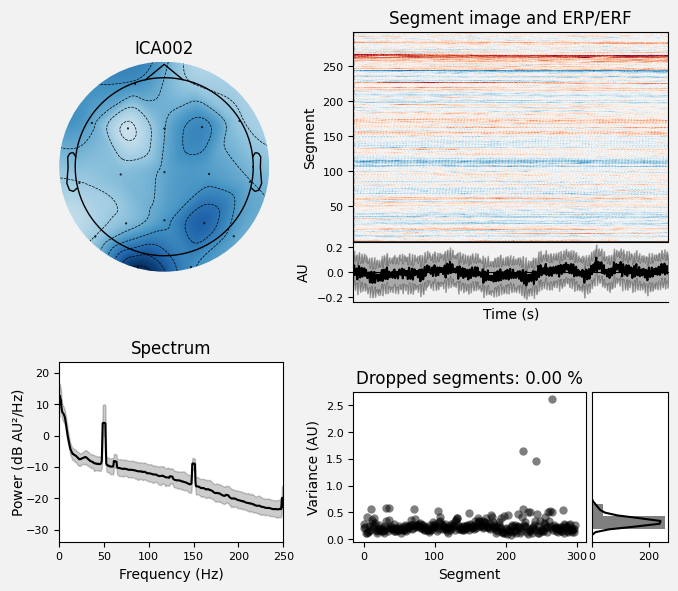

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [14]:
ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]
ica.plot_properties(raw, picks=ica.exclude)